# Using Keras

Since computation is a bottleneck for neural nets, it is worthwhile to learn to construct neural nets with a dedicated deep learning framework rather than simply raw Python with NumPy, as we have used so far, because they allow highly optimized computation accelerated by graphics processing units (GPUs) and let us create nets quickly and easily.

As of now, the most popular solutions are probably Facebook's PyTorch and Google's TensorFlow with Keras. (There are some other solutions like Theano, Caffe, and MXNet as well.) Both have two main parts: (1) highly optimized tensor computing, including matrix multiplication and (2) simple functionality for creating neural networks with optimized backpropagation.

We only use TensorFlow + Keras in the class, but it is good to know these other options exist.

### Writing a Fully-connected Feedforward Neural Net with Keras

We will aim to write a neural net similar to what we have constructed through the course so far. That is, it should feed data forward through a sequence of layers, the layers should be fully connected (dense), and we should use SGD to optimize it. We can import these things directly from Keras.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

Let's construct the net to classify MNIST (our beloved benchmarking dataset).

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 44us/sample - loss: 2.2954 - accuracy: 0.1363 - val_loss: 2.2855 - val_accuracy: 0.2202
Epoch 2/100
60000/60000 [==============================] - 2s 34us/sample - loss: 2.2769 - accuracy: 0.1951 - val_loss: 2.2658 - val_accuracy: 0.2321
Epoch 3/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2526 - accuracy: 0.3111 - val_loss: 2.2347 - val_accuracy: 0.4171
Epoch 4/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2122 - accuracy: 0.4481 - val_loss: 2.1821 - val_accuracy: 0.6217
Epoch 5/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.1457 - accuracy: 0.5634 - val_loss: 2.0977 - val_accuracy: 0.5981
Epoch 6/100
60000/60000 [==============================] - 2s 31us/sample - loss: 2.0417 - accuracy: 0.6039 - val_loss: 1.9696 - val_accuracy: 0.5775
Epoch 7/100
60000/60000 [=========================

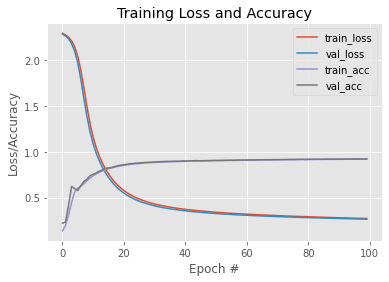

In [19]:
# Create a feedforward neural net
model = Sequential()

# Create the first hidden layer
model.add(Dense(256, input_shape = (784,), activation = "sigmoid"))

# Create the second hidden layer
model.add(Dense(128, activation = "sigmoid"))

# Create the output layer
model.add(Dense(10, activation = "sigmoid"))

model.compile(loss = "categorical_crossentropy", optimizer = SGD(0.01), metrics = ["accuracy"])

### CLASSIFY MNIST PICTURES

# create a dataset of 1000 MNIST images, reshaped as single vectors, and labels

((trainX, trainY), (testX, testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

trainX = trainX/255.0
testX = testX/255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# fit the model to the training data
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = 100, batch_size = 128)

print("Validation accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX, batch_size = 128)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 41us/sample - loss: 1.2278 - accuracy: 0.7215 - val_loss: 0.6101 - val_accuracy: 0.8666
Epoch 2/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5297 - accuracy: 0.8778 - val_loss: 0.4417 - val_accuracy: 0.8994
Epoch 3/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4317 - accuracy: 0.8979 - val_loss: 0.3860 - val_accuracy: 0.9090
Epoch 4/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3892 - accuracy: 0.9079 - val_loss: 0.3593 - val_accuracy: 0.9156
Epoch 5/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3620 - accuracy: 0.9148 - val_loss: 0.3366 - val_accuracy: 0.9217
Epoch 6/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3419 - accuracy: 0.9199 - val_loss: 0.3197 - val_accuracy: 0.9267
Epoch 7/100
60000/60000 [=========================

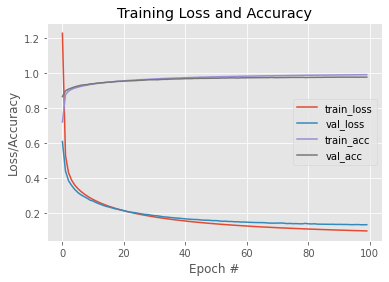

In [7]:
# Create a feedforward neural net
model = Sequential()

# Create the first hidden layer
model.add(Dense(256, input_shape = (784,), activation = "relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

# Create the second hidden layer
model.add(Dense(128, activation = "relu", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

# Create the output layer
model.add(Dense(10, activation = "softmax", kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)))

model.compile(loss = "categorical_crossentropy", optimizer = SGD(0.01), metrics = ["accuracy"])

### CLASSIFY MNIST PICTURES

# create a dataset of 1000 MNIST images, reshaped as single vectors, and labels

((trainX, trainY), (testX, testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

trainX = trainX/255.0
testX = testX/255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# fit the model to the training data
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = 100, batch_size = 128)

print("Validation accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX, batch_size = 128)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2711 - accuracy: 0.9216 - val_loss: 0.1338 - val_accuracy: 0.9577
Epoch 2/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1033 - accuracy: 0.9680 - val_loss: 0.0871 - val_accuracy: 0.9739
Epoch 3/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0666 - accuracy: 0.9801 - val_loss: 0.0803 - val_accuracy: 0.9741
Epoch 4/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0786 - val_accuracy: 0.9756
Epoch 5/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0671 - val_accuracy: 0.9786
Epoch 6/50
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 7/50
60000/60000 [==============================] 

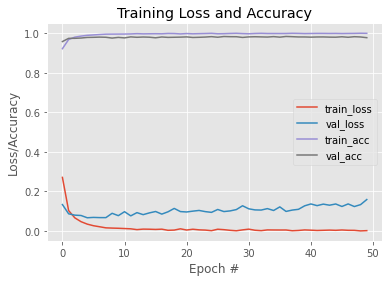

In [15]:
# Create a feedforward neural net
model = Sequential()

# Create the first hidden layer
model.add(Dense(256, input_shape = (784,), activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0)))

# Create the second hidden layer
model.add(Dense(128, activation = 'relu', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0)))

# Create the output layer
model.add(Dense(10, activation = 'softmax', kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0)))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### CLASSIFY MNIST PICTURES

# create a dataset of 1000 MNIST images, reshaped as single vectors, and labels

((trainX, trainY), (testX, testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

trainX = trainX/255.0
testX = testX/255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# fit the model to the training data
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = 50, batch_size = 128)

print("Validation accuracy")
testY = LabelBinarizer().fit_transform(testY)
predictedY = model.predict(testX, batch_size = 128)
predictedY = predictedY.argmax(axis=1)
testY = testY.argmax(axis=1)

print(classification_report(testY, predictedY))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 160us/sample - loss: 1.8788 - accuracy: 0.3208 - val_loss: 1.7292 - val_accuracy: 0.3798
Epoch 2/100
50000/50000 [==============================] - 7s 135us/sample - loss: 1.7021 - accuracy: 0.3919 - val_loss: 1.6841 - val_accuracy: 0.4019
Epoch 3/100
50000/50000 [==============================] - 7s 132us/sample - loss: 1.6387 - accuracy: 0.4160 - val_loss: 1.6350 - val_accuracy: 0.4168
Epoch 4/100
50000/50000 [==============================] - 7s 136us/sample - loss: 1.5931 - accuracy: 0.4322 - val_loss: 1.5887 - val_accuracy: 0.4350
Epoch 5/100
50000/50000 [==============================] - 8s 158us/sample - loss: 1.5635 - accuracy: 0.4426 - val_loss: 1.5649 - val_accuracy: 0.4406
Epoch 6/100
50000/50000 [==============================] - 7s 134us/sample - loss: 1.5456 - accuracy: 0.4483 - val_loss: 1.5559 - val_accuracy: 0.4475
Epoch 7/100
50000

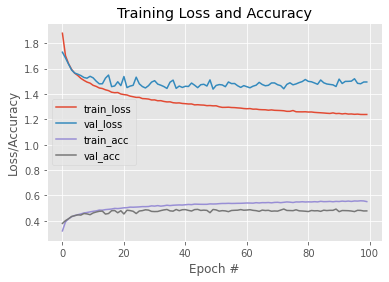

In [20]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX/255.0
testX = testX/255.0

trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
#opt = SGD(lr=0.5, momentum=0.5)
model.compile(loss="categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = 100, batch_size = 32)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size = 32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 17s 346us/sample - loss: 0.0923 - accuracy: 0.1324 - val_loss: 0.0898 - val_accuracy: 0.1678
Epoch 2/1000
50000/50000 [==============================] - 16s 316us/sample - loss: 0.0897 - accuracy: 0.1778 - val_loss: 0.0896 - val_accuracy: 0.2092
Epoch 3/1000
50000/50000 [==============================] - 13s 269us/sample - loss: 0.0895 - accuracy: 0.2098 - val_loss: 0.0894 - val_accuracy: 0.2100
Epoch 4/1000
50000/50000 [==============================] - 15s 292us/sample - loss: 0.0892 - accuracy: 0.2182 - val_loss: 0.0891 - val_accuracy: 0.2227
Epoch 5/1000
50000/50000 [==============================] - 17s 333us/sample - loss: 0.0889 - accuracy: 0.2264 - val_loss: 0.0887 - val_accuracy: 0.2323
Epoch 6/1000
50000/50000 [==============================] - 15s 307us/sample - loss: 0.0884 - accuracy: 0.2359 - val_loss: 0.0881 - val_accuracy: 0.2476
Epoch

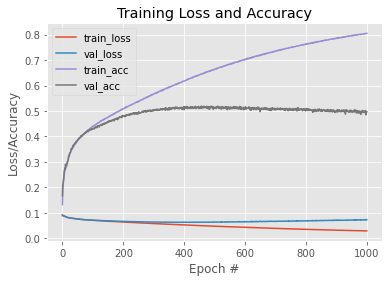

In [23]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX/255.0
testX = testX/255.0

trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))

# train the model using SGD
print("[INFO] training network...")
opt = SGD(lr=0.05, momentum=0.5)
model.compile(loss="mean_squared_error", optimizer = opt, metrics = ["accuracy"])
maxIt = 1000
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = maxIt, batch_size = 32)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size = 32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()